# Load libraries and functions

In [1]:
import pandas as pd
import numpy as np

#random seed for reproducibility
np.random.seed(67)

In [2]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib
from sklearn.preprocessing import StandardScaler

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

style.use('ggplot')

import seaborn as sns

In [3]:
data = pd.read_csv('emotion outputs full v1 enhanced.csv')

In [4]:
df = data.drop(columns=['top_value','top_label'])

In [5]:
df.shape

(3061, 28)

# v1_full data set

## Scaling 

In [6]:
df.mean()

admiration        0.004711
amusement         0.000527
anger             0.000973
annoyance         0.001723
approval          0.053274
caring            0.062025
confusion         0.008672
curiosity         0.099373
desire            0.018974
disappointment    0.008067
disapproval       0.003048
disgust           0.002291
embarrassment     0.000126
excitement        0.028501
fear              0.002248
gratitude         0.051647
grief             0.003382
joy               0.007454
love              0.000902
nervousness       0.001939
optimism          0.016387
pride             0.002749
realization       0.008897
relief            0.000372
remorse           0.000959
sadness           0.020691
surprise          0.010305
neutral           0.579785
dtype: float64

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [8]:
df_scaled.columns = df.columns

## diagnostics to determine if FA is approrpriate

In [9]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
chi_square_value, p_value

(109447.040376717, 0.0)

In [10]:
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

/Users/alexanderliss/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.011904188666522366

## Determining Number of factors 

In [13]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.58256440e+00, 2.06655760e+00, 1.96069061e+00, 1.71700314e+00,
       1.36329085e+00, 1.32455339e+00, 1.20614338e+00, 1.12121157e+00,
       1.09336062e+00, 1.04951609e+00, 1.03930371e+00, 1.01176017e+00,
       1.00354653e+00, 9.93393978e-01, 9.62530521e-01, 9.57880069e-01,
       9.01068650e-01, 8.87052418e-01, 8.66793749e-01, 8.29099079e-01,
       7.99658267e-01, 6.51163913e-01, 5.97411659e-01, 4.60486967e-01,
       3.19050930e-01, 1.96159265e-01, 3.87484852e-02, 2.61820826e-14])

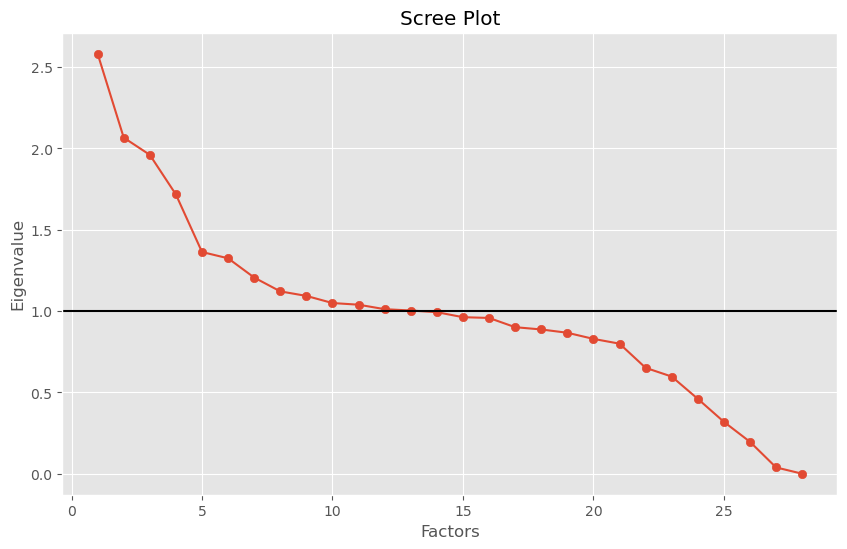

In [14]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

plt.show()

## running analysis 

In [15]:
fa = FactorAnalyzer(rotation="varimax", n_factors=13)
fa.fit(df_scaled)
fa
#pd.DataFrame(fa.loadings_)

FactorAnalyzer(n_factors=13, rotation='varimax', rotation_kwargs={})

In [16]:
scores = fa.transform(df_scaled)
scores.shape

(3061, 13)

In [17]:
pd.DataFrame(fa.loadings_, index=df_scaled.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12
admiration,-0.004276,-0.002651,-0.006768,0.009835,-0.029603,0.120602,-0.003941,0.001938,0.022254,0.009284,0.031295,0.128530,-0.027857
amusement,0.010615,-0.016834,0.301922,-0.028516,-0.017613,-0.013614,0.043236,0.097244,0.003672,-0.001064,-0.003291,0.127243,-0.048536
anger,0.021347,0.945964,-0.029677,0.016196,-0.016124,-0.006571,0.238319,0.047071,0.017686,-0.001729,0.004313,-0.019599,0.017593
annoyance,0.033827,0.730008,0.118023,-0.013482,0.004780,-0.014739,0.007084,-0.027586,-0.007343,-0.004768,-0.005065,-0.055635,0.039528
approval,-0.027452,-0.011985,0.004844,0.049112,-0.073165,-0.010218,-0.002256,-0.019227,0.989114,-0.018309,-0.007669,-0.001361,0.110700
caring,-0.022101,-0.012249,-0.072006,0.966901,-0.071023,-0.090546,-0.016691,0.078994,-0.070388,-0.019662,-0.044013,-0.147906,-0.091435
confusion,-0.002120,0.004350,0.001841,-0.016634,0.163111,-0.012042,-0.010325,-0.007781,-0.017731,-0.005920,-0.002512,-0.003290,0.019990
curiosity,-0.004323,-0.036248,-0.040370,-0.058674,0.983410,-0.044535,0.003626,-0.013021,-0.004770,0.002064,-0.005987,-0.057335,-0.168589
desire,-0.011000,0.116006,0.010815,0.010549,-0.033115,-0.017911,0.989576,0.038162,-0.008842,-0.006861,-0.004871,-0.028405,0.009555
disappointment,0.217939,0.076167,-0.002166,-0.008442,0.007712,-0.011506,-0.028502,0.006878,-0.043062,-0.006906,-0.006087,-0.007968,0.244615


In [18]:
pd.DataFrame(fa.get_factor_variance())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.973180,1.770465,1.654566,1.328754,1.281204,1.152422,1.081377,1.060785,1.055875,1.018143,0.788297,0.577057,0.554410
1,0.070471,0.063231,0.059092,0.047456,0.045757,0.041158,0.038621,0.037885,0.037710,0.036362,0.028153,0.020609,0.019800
2,0.070471,0.133702,0.192793,0.240249,0.286006,0.327164,0.365785,0.403670,0.441380,0.477742,0.505895,0.526504,0.546305


# V2 dropping Vars with low Signal

In [19]:
data = pd.read_csv('emotion outputs full v1 enhanced.csv')

In [20]:
data.top_label.value_counts(normalize=True)

neutral           0.601764
curiosity         0.096700
caring            0.061418
gratitude         0.057498
approval          0.047043
excitement        0.033976
desire            0.021562
sadness           0.016335
optimism          0.014374
surprise          0.010127
joy               0.008821
disappointment    0.005880
realization       0.005554
grief             0.005227
confusion         0.004247
pride             0.002614
fear              0.002614
disgust           0.002287
disapproval       0.001633
admiration        0.000327
Name: top_label, dtype: float64

In [21]:
df = data.drop(columns=['top_value','top_label'])

In [22]:
df.sum()

admiration          14.419048
amusement            1.612284
anger                2.977345
annoyance            5.275048
approval           163.070967
caring             189.857067
confusion           26.543524
curiosity          304.181047
desire              58.080412
disappointment      24.692105
disapproval          9.329376
disgust              7.011566
embarrassment        0.385355
excitement          87.240191
fear                 6.879937
gratitude          158.090282
grief               10.352260
joy                 22.817534
love                 2.761325
nervousness          5.936310
optimism            50.160584
pride                8.415460
realization         27.233820
relief               1.139360
remorse              2.934910
sadness             63.334995
surprise            31.544931
neutral           1774.722950
dtype: float64

In [23]:
cols_to_drop = pd.DataFrame(df.mean(), columns=['value'])
cols_to_drop.sort_values('value', ascending=False)

,value
neutral,0.579785
curiosity,0.099373
caring,0.062025
approval,0.053274
gratitude,0.051647
excitement,0.028501
sadness,0.020691
desire,0.018974
optimism,0.016387
surprise,0.010305


In [24]:
cols_to_drop = cols_to_drop[cols_to_drop.value > .005]
cols_to_drop.shape

(14, 1)

In [25]:
list(cols_to_drop.index)

['approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'excitement',
 'gratitude',
 'joy',
 'optimism',
 'realization',
 'sadness',
 'surprise',
 'neutral']

In [26]:
df = df[list(cols_to_drop.index)]
df.shape

(3061, 14)

## Scaling 

In [27]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [28]:
df_scaled.columns = df.columns

## diagnostics to determine if FA is approrpriate

In [29]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
chi_square_value, p_value

(9442.900134170228, 0.0)

In [30]:
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.02484683398792999

## Determining Number of factors 

In [31]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.65096148, 1.2562952 , 1.18802758, 1.16583215, 1.0863133 ,
       1.05934862, 1.01666984, 1.0007218 , 0.99015619, 0.95267428,
       0.88822079, 0.86714564, 0.85590995, 0.02172317])

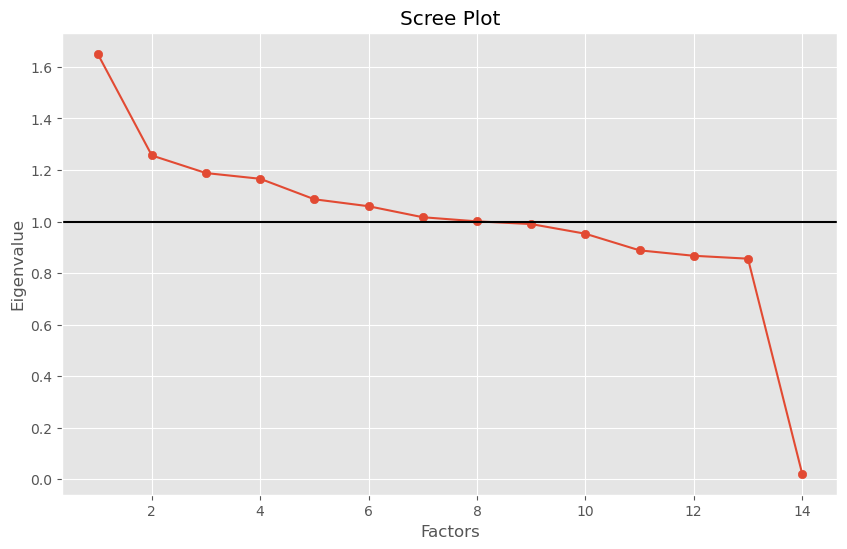

In [32]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

plt.show()

## running analysis 

In [33]:
fa = FactorAnalyzer(rotation="varimax", n_factors=8)
fa.fit(df_scaled)
fa
#pd.DataFrame(fa.loadings_)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [34]:
scores = fa.transform(df_scaled)
scores.shape

(3061, 8)

In [35]:
pd.DataFrame(fa.loadings_, index=df_scaled.columns)

,0,1,2,3,4,5,6,7
approval,-0.069643,-0.007246,-0.030354,0.993581,0.001024,-0.004710,-0.012473,-0.077490
caring,-0.076359,0.995585,-0.029133,-0.028929,-0.005230,0.000956,-0.054985,-0.049749
confusion,0.160747,-0.008422,-0.005493,-0.012860,-0.008391,-0.001017,0.005351,0.016478
curiosity,0.990308,-0.036051,-0.034369,-0.044173,-0.002914,-0.033199,-0.021606,-0.119143
desire,-0.036520,0.003083,-0.016075,-0.014191,0.997361,0.001544,-0.030412,-0.018046
disappointment,-0.000620,-0.010481,-0.006138,0.001515,-0.003999,-0.004083,-0.001926,0.312617
excitement,-0.054511,-0.024960,-0.042105,-0.043527,-0.011801,-0.010350,0.646996,-0.044844
gratitude,-0.057310,-0.026800,0.997570,-0.035824,-0.023325,-0.014244,-0.003521,-0.049008
joy,0.006228,-0.005657,0.014080,0.037421,-0.007493,-0.011136,0.225429,-0.001551
optimism,-0.024487,0.008449,-0.007581,0.011490,0.002037,0.997228,-0.032950,-0.019569


In [36]:
pd.DataFrame(fa.get_factor_variance())

,0,1,2,3,4,5,6,7
0,1.256663,1.152203,1.143413,1.109777,1.041267,1.026229,0.661577,0.522805
1,0.089762,0.082300,0.081672,0.079270,0.074376,0.073302,0.047255,0.037343
2,0.089762,0.172062,0.253734,0.333004,0.407380,0.480682,0.527938,0.565281


In [37]:
factor_outputs = pd.DataFrame(fa.transform(df_scaled))

In [39]:
factor_outputs.to_csv('factor outputs k=7.csv', index=False)

In [40]:
pd.DataFrame(fa.loadings_, index=df_scaled.columns).to_csv('factor scores k=7.csv',index=False)

In [41]:
pd.DataFrame(list(df_scaled.columns)).to_csv('emotion_cols.csv',index=False) # these are the 14 inputs to the factor analysis

In [38]:
all you base are belong to us

SyntaxError: invalid syntax (898764352.py, line 1)

# V3 let's remove neutral and see what we get

In [ ]:
df = df.drop(columns='neutral')

## Scaling 

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [ ]:
df_scaled.columns = df.columns

## diagnostics to determine if FA is approrpriate

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
chi_square_value, p_value

In [ ]:
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

## Determining Number of factors 

In [ ]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

In [ ]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

plt.show()

## running analysis 

In [ ]:
fa = FactorAnalyzer(rotation="varimax", n_factors=7)
fa.fit(df_scaled)
fa
#pd.DataFrame(fa.loadings_)

In [ ]:
scores = fa.transform(df_scaled)
scores.shape

In [ ]:
pd.DataFrame(fa.loadings_, index=df_scaled.columns)

In [ ]:
pd.DataFrame(fa.get_factor_variance())

In [ ]:
factor_outputs = pd.DataFrame(fa.transform(df_scaled))